# Capstone Project: Maximizing Taxi Tip Margins
## Exploratory Data Analysis

Randy Ngo, Hector San Andres Izquierdo, Jennifer Park, Angela Lin

## Getting Started
For this exploratory data analysis, the first step is to ensure the availability of all necessary data. The "New York City Taxi Trip" dataset provides a comprehensive collection of data related to yellow taxi trips in the New York City region. This dataset includes details such as pick-up and dropff dates/times, locations, trip distances, passenger counts, airport fees, fare amounts, tip amounts, total amounts, etc.

[New York City Taxi Trip Record Data](https://www.nyc.gov/site/tlc/about/tlc-trip-record-data.page)

## Data Dictionary Overview
Before cleaning and wrangling the data, let's familiarize ourselves with the data we just imported.

The New York City Taxi Trip Dataset serves as a comprehensive repository of data on yellow taxi trips across the city. It captures essential trip details across multiple fields, including ride characteristics, fare breakdowns, passenger behaviors, and spatial travel patterns.

Dataset Fields Overview:

*   tpep_pickup_datetime: Timestamp when the trip started.
*   tpep_dropoff_datetime: Timestamp when the trip ended.
*   passenger_count: Number of passengers.
*   trip_distance: Distance traveled in miles.
*   PULocationID: Pickup location ID referencing NYC taxi zones.
*   DOLocationID: Drop-off location ID referencing NYC taxi zones.
*   payment_type: Payment method used by the passenger.
*   fare_amount: Base fare for the trip.
*   extra: Additional charges.
*   tip_amount: Gratuity provided by the passenger.
*   tolls_amount: Toll charges incurred during the trip.
*   total_amount: Total cost of the trip.






In [ ]:
# import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import folium
from folium.plugins import HeatMap
from datetime import datetime

In [ ]:
# dataframe
df2009 = pd.read_parquet('subset2009.parquet')
df2014 = pd.read_parquet('subset2014.parquet')
df2019 = pd.read_parquet('subset2019.parquet')
df2024 = pd.read_parquet('subset2024.parquet')

## Pre-Processing the Data
### Data Cleaning/Wrangling

In [ ]:
# combining subset datasets
df_all = pd.concat([df2009, df2014, df2019, df2024], ignore_index=True)
print("Combined DataFrame info:")
print(df_all.info())

Combined DataFrame info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4620922 entries, 0 to 4620921
Data columns (total 24 columns):
 #   Column                 Dtype         
---  ------                 -----         
 0   VendorID               object        
 1   tpep_pickup_datetime   datetime64[us]
 2   tpep_dropoff_datetime  object        
 3   passenger_count        float64       
 4   trip_distance          float64       
 5   Start_Lon              float64       
 6   Start_Lat              float64       
 7   End_Lon                float64       
 8   End_Lat                float64       
 9   payment_type           int64         
 10  fare_amount            float64       
 11  extra                  float64       
 12  tip_amount             float64       
 13  tolls_amount           float64       
 14  hour                   int32         
 15  day_of_week            int32         
 16  month                  int32         
 17  year                   int32         
 1

In [ ]:
# drop null values
df_all = df_all.dropna()

In [ ]:
# 'year' column
df2009['year'] = 2009
df2014['year'] = 2014
df2019['year'] = 2019
df2024['year'] = 2024

# concatenate
df_all = pd.concat([df2009, df2014, df2019, df2024], ignore_index=True)

In [ ]:
df_all['tpep_pickup_datetime'] = pd.to_datetime(df_all['tpep_pickup_datetime'])

df_all['month'] = df_all['tpep_pickup_datetime'].dt.month
df_all['day_of_week'] = df_all['tpep_pickup_datetime'].dt.dayofweek
df_all['hour'] = df_all['tpep_pickup_datetime'].dt.hour

## Data Exploratory Analysis

In [ ]:
print("\nSummary statistics for tip_amount by year:")
print(df_all.groupby('year')['tip_amount'].describe())


Summary statistics for tip_amount by year:
          count      mean       std  min   25%   50%   75%     max
year                                                              
2009  1708960.0  2.178296  2.052079  0.0  1.00  1.89  2.34  100.00
2014  1654436.0  2.592618  2.574159  0.0  1.20  2.00  3.00  288.71
2019   845848.0  3.056529  2.910929  0.0  1.66  2.35  3.45  357.31
2024   411678.0  4.377667  4.167241  0.0  2.14  3.25  5.00  130.00


In [ ]:
np.corrcoef(df_all['fare_amount'], df_all['tip_amount'])

array([[1.        , 0.72806271],
       [0.72806271, 1.        ]])

In [ ]:
np.corrcoef(df_all['fare_amount'], df_all['trip_distance'])

array([[1.00000000e+00, 5.21337353e-04],
       [5.21337353e-04, 1.00000000e+00]])

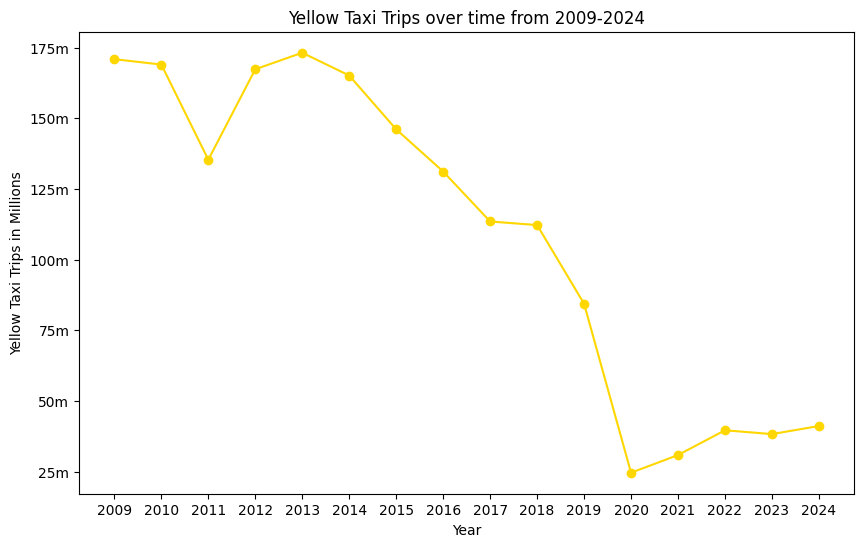

In [ ]:
yearly_trips = [170896055, 168994353, 135335924, 167331308, 173179759, 165114361, 146087462, 131165043, 113496874, 112234626, 84399019, 24648499, 30904072, 39656098, 38310226, 41169720]
years = [2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022, 2023, 2024]
plt.figure(figsize=(10, 6))
# for i in range(len(years)):
plt.plot(years, yearly_trips, marker='o', color='gold');

plt.xticks(range(2009, 2025), years);
# plt.yticks(range(24000000, 175000000));
ylabels = ['25m', '50m', '75m', '100m', '125m', '150m', '175m']
plt.yticks([25000000, 50000000, 75000000, 100000000, 125000000, 150000000, 175000000], ylabels)
plt.xlabel('Year')
plt.ylabel('Yellow Taxi Trips in Millions')
plt.title('Yellow Taxi Trips over time from 2009-2024');

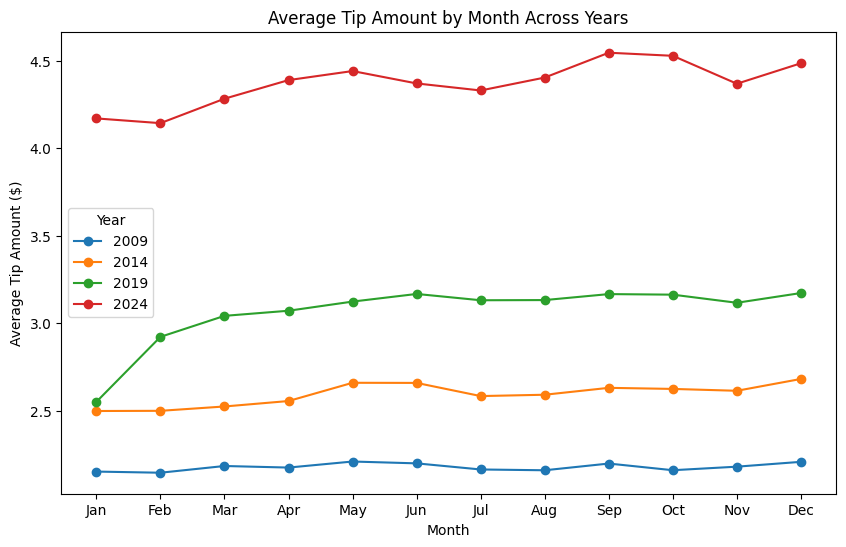

In [ ]:
avg_tip_by_month = df_all.groupby(['year', 'month'])['tip_amount'].mean().reset_index()
plt.figure(figsize=(10, 6))
for yr in [2009, 2014, 2019, 2024]:
    data = avg_tip_by_month[avg_tip_by_month['year'] == yr]
    plt.plot(data['month'], data['tip_amount'], marker='o', label=str(yr))
plt.xlabel('Month')

month_labels = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun',
                'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
plt.xticks(range(1, 13), month_labels)
plt.ylabel('Average Tip Amount ($)')
plt.title('Average Tip Amount by Month Across Years')
plt.legend(title='Year')
plt.show()

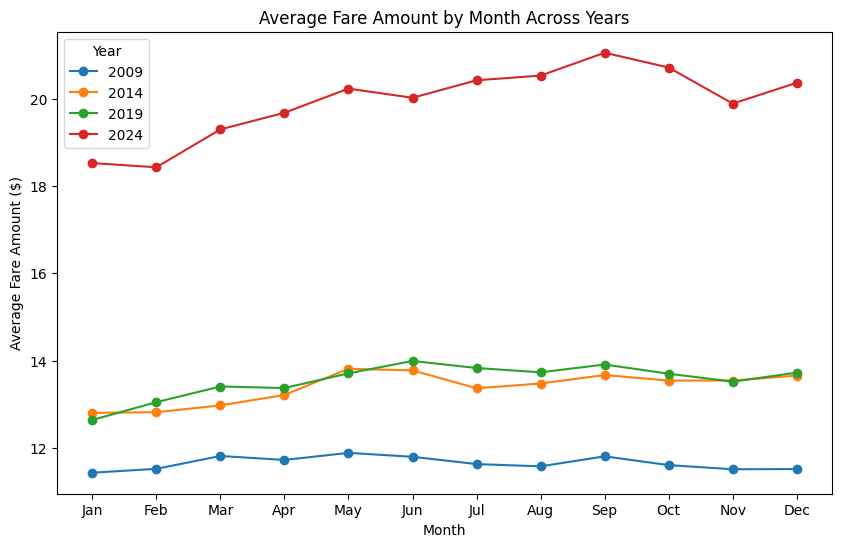

In [ ]:
avg_fare_by_month = df_all.groupby(['year', 'month'])['fare_amount'].mean().reset_index()
plt.figure(figsize=(10, 6))
for yr in [2009, 2014, 2019, 2024]:
    data = avg_fare_by_month[avg_fare_by_month['year'] == yr]
    plt.plot(data['month'], data['fare_amount'], marker='o', label=str(yr))
plt.xlabel('Month')
plt.ylabel('Average Fare Amount ($)')
plt.title('Average Fare Amount by Month Across Years')

month_labels = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun',
                'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
plt.xticks(range(1, 13), month_labels)
plt.legend(title='Year')
plt.show()

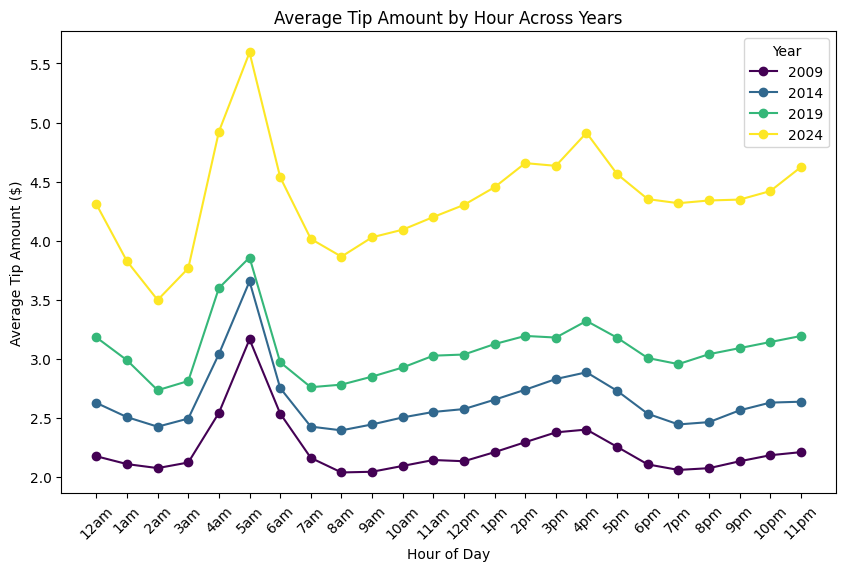

In [ ]:
cmap = plt.cm.viridis
years = [2009, 2014, 2019, 2024]
colors = cmap(np.linspace(0, 1, len(years)))

avg_tip_by_hour = df_all.groupby(['year', 'hour'])['tip_amount'].mean().reset_index()
plt.figure(figsize=(10, 6))
for i, yr in enumerate(years):
    data = avg_tip_by_hour[avg_tip_by_hour['year'] == yr]
    plt.plot(data['hour'], data['tip_amount'], marker='o', label=str(yr), color=colors[i])

# custom hour labels
hour_labels = []
for h in range(24):
    if h == 0:
        hour_labels.append('12am')
    elif h < 12:
        hour_labels.append(f'{h}am')
    elif h == 12:
        hour_labels.append('12pm')
    else:
        hour_labels.append(f'{h-12}pm')

plt.xticks(range(0, 24), hour_labels, rotation=45)
plt.ylabel('Average Tip Amount ($)')
plt.xlabel('Hour of Day')
plt.title('Average Tip Amount by Hour Across Years')
plt.legend(title='Year')
plt.show()

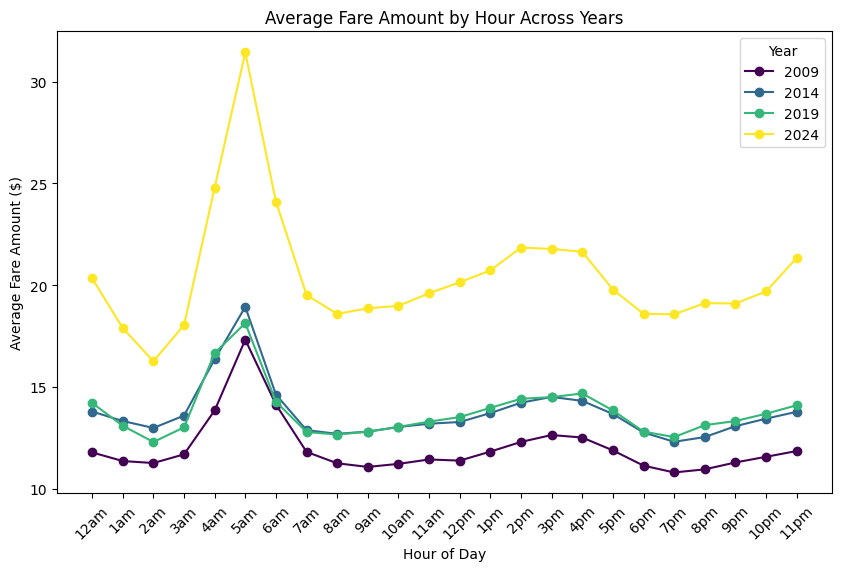

In [ ]:
cmap = plt.cm.viridis
years = [2009, 2014, 2019, 2024]
colors = cmap(np.linspace(0, 1, len(years)))

avg_fare_by_hour = df_all.groupby(['year', 'hour'])['fare_amount'].mean().reset_index()
plt.figure(figsize=(10, 6))
for i, yr in enumerate(years):
    data = avg_fare_by_hour[avg_fare_by_hour['year'] == yr]
    plt.plot(data['hour'], data['fare_amount'], marker='o', label=str(yr), color=colors[i])

hour_labels = []
for h in range(24):
    if h == 0:
        hour_labels.append('12am')
    elif h < 12:
        hour_labels.append(f'{h}am')
    elif h == 12:
        hour_labels.append('12pm')
    else:
        hour_labels.append(f'{h-12}pm')

plt.xticks(range(0, 24), hour_labels, rotation=45)
plt.ylabel('Average Fare Amount ($)')
plt.xlabel('Hour of Day')
plt.title('Average Fare Amount by Hour Across Years')
plt.legend(title='Year')
plt.show()

In [ ]:
df_all = df_all[df_all['fare_amount'] > 0].copy()

df_all['tip_pct'] = (df_all['tip_amount'] / df_all['fare_amount']) * 100

print("Summary statistics for Tip Percentage by Year:")
tip_pct_stats = df_all.groupby('year')['tip_pct'].describe()
print(tip_pct_stats)

Summary statistics for Tip Percentage by Year:
          count       mean          std  min        25%        50%        75%  \
year                                                                            
2009  1708960.0  20.485383    22.620366  0.0  14.938272  19.801980  23.529412   
2014  1654436.0  22.688528  1668.668000  0.0  16.666667  20.833333  23.076923   
2019   845848.0  25.766594   260.522648  0.0  20.210526  25.562500  30.322581   
2024   411678.0  24.918704    22.676335  0.0  20.000000  25.752212  30.379747   

            max  
year             
2009     3700.0  
2014  1800000.0  
2019   150000.0  
2024     6250.0  


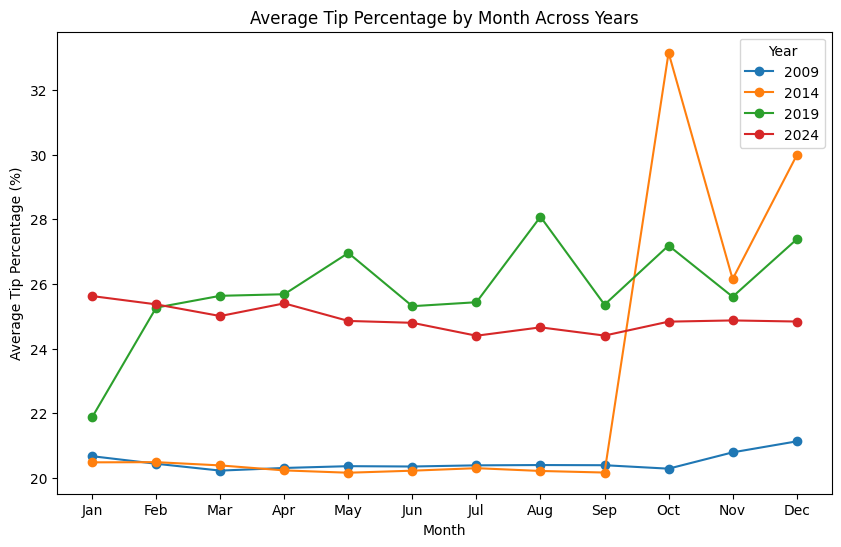

In [ ]:
avg_tip_pct_by_month = df_all.groupby(['year', 'month'])['tip_pct'].mean().reset_index()
plt.figure(figsize=(10, 6))
for yr in [2009, 2014, 2019, 2024]:
    data = avg_tip_pct_by_month[avg_tip_pct_by_month['year'] == yr]
    plt.plot(data['month'], data['tip_pct'], marker='o', label=str(yr))
plt.xlabel('Month')
plt.ylabel('Average Tip Percentage (%)')
plt.title('Average Tip Percentage by Month Across Years')
month_labels = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun',
                'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
plt.xticks(range(1, 13), month_labels)
plt.legend(title='Year')
plt.show()

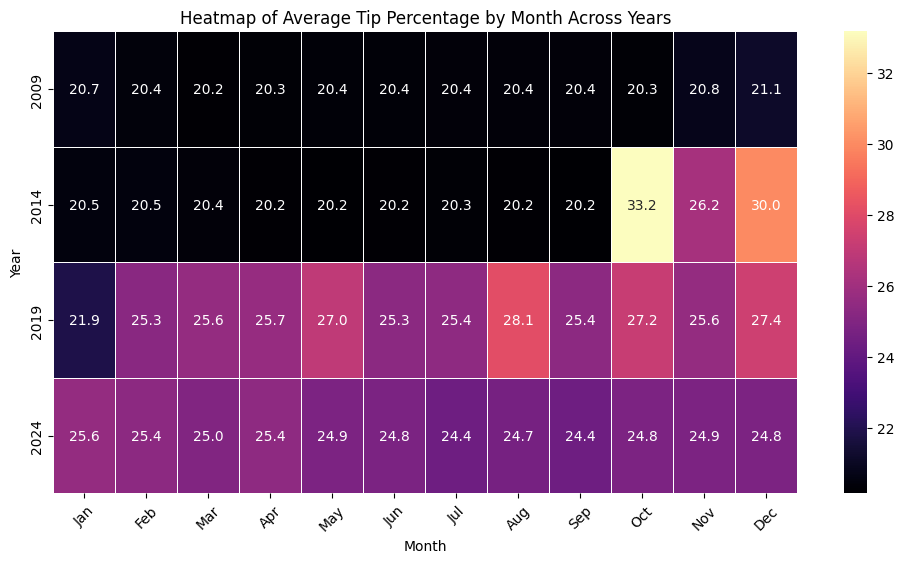

In [ ]:
pivot_table = avg_tip_pct_by_month.pivot(index='year', columns='month', values='tip_pct')

plt.figure(figsize=(12, 6))
sns.heatmap(pivot_table, cmap='magma', annot=True, fmt=".1f", linewidths=0.5)

plt.xlabel('Month')
plt.ylabel('Year')
plt.title('Heatmap of Average Tip Percentage by Month Across Years')

plt.xticks(ticks=np.arange(12) + 0.5, labels=month_labels, rotation=45)
plt.show()

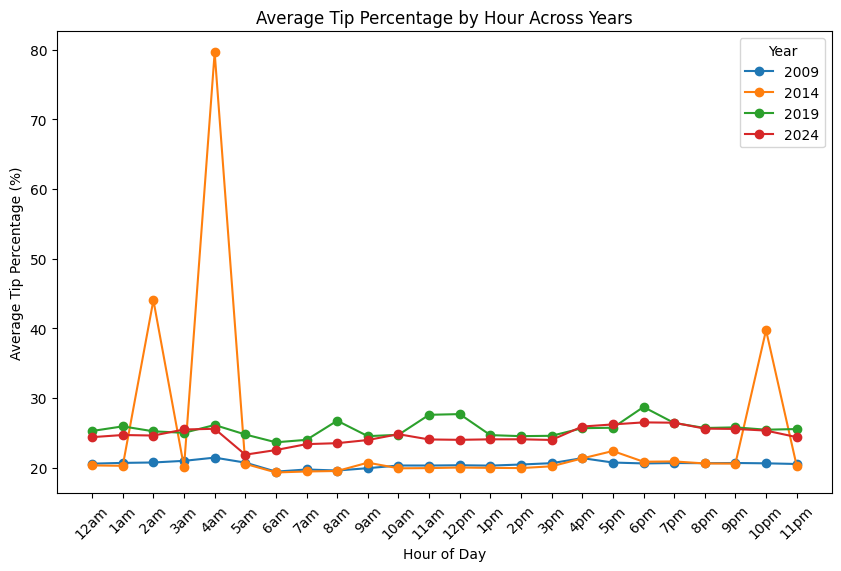

In [ ]:
avg_tip_pct_by_hour = df_all.groupby(['year', 'hour'])['tip_pct'].mean().reset_index()
plt.figure(figsize=(10, 6))
for yr in [2009, 2014, 2019, 2024]:
    data = avg_tip_pct_by_hour[avg_tip_pct_by_hour['year'] == yr]
    plt.plot(data['hour'], data['tip_pct'], marker='o', label=str(yr))
plt.xlabel('Hour of Day')

hour_labels = []
for h in range(24):
    if h == 0:
        hour_labels.append('12am')
    elif h < 12:
        hour_labels.append(f'{h}am')
    elif h == 12:
        hour_labels.append('12pm')
    else:
        hour_labels.append(f'{h-12}pm')

plt.xticks(range(0, 24), hour_labels, rotation=45)
plt.ylabel('Average Tip Percentage (%)')
plt.title('Average Tip Percentage by Hour Across Years')
plt.legend(title='Year')
plt.show()

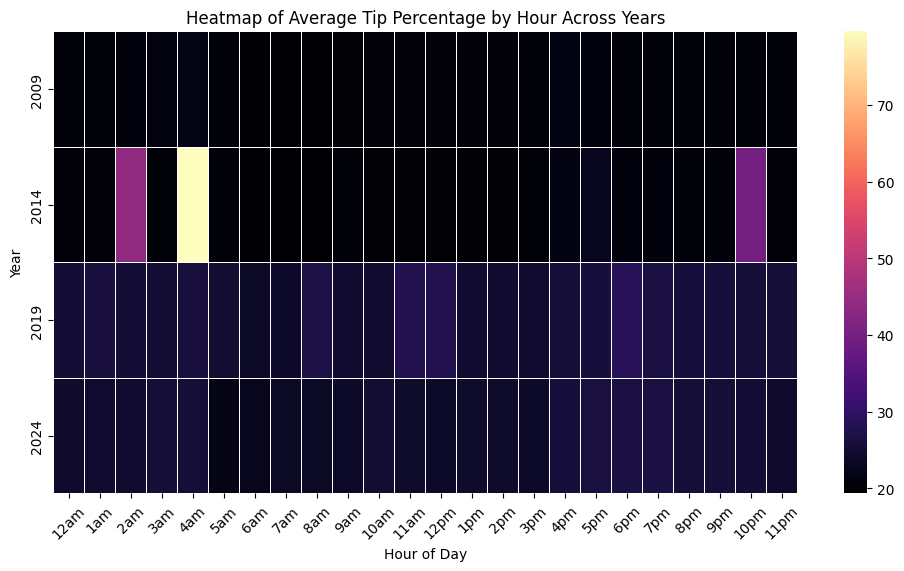

In [ ]:
pivot_table = avg_tip_pct_by_hour.pivot(index='year', columns='hour', values='tip_pct')

hour_labels = []
for h in range(24):
    if h == 0:
        hour_labels.append('12am')
    elif h < 12:
        hour_labels.append(f'{h}am')
    elif h == 12:
        hour_labels.append('12pm')
    else:
        hour_labels.append(f'{h-12}pm')

# create heatmap
plt.figure(figsize=(12, 6))
sns.heatmap(pivot_table, cmap='magma', annot=False, linewidths=0.5)  # remove numbers

plt.xlabel('Hour of Day')
plt.ylabel('Year')
plt.title('Heatmap of Average Tip Percentage by Hour Across Years')
plt.xticks(ticks=np.arange(24) + 0.5, labels=hour_labels, rotation=45)
plt.show()

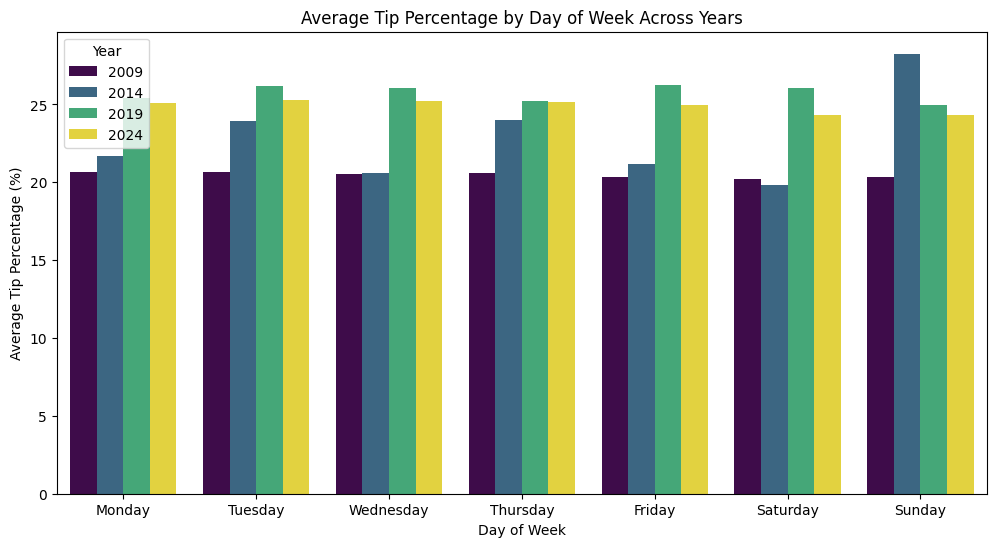

In [ ]:
day_labels = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

avg_tip_pct_by_day = df_all.groupby(['year', 'day_of_week'])['tip_pct'].mean().reset_index()

plt.figure(figsize=(12, 6))
sns.barplot(data=avg_tip_pct_by_day, x='day_of_week', y='tip_pct', hue='year', palette='viridis')

plt.xlabel('Day of Week')
plt.ylabel('Average Tip Percentage (%)')
plt.title('Average Tip Percentage by Day of Week Across Years')
plt.xticks(ticks=range(7), labels=day_labels)
plt.legend(title='Year')
plt.show()

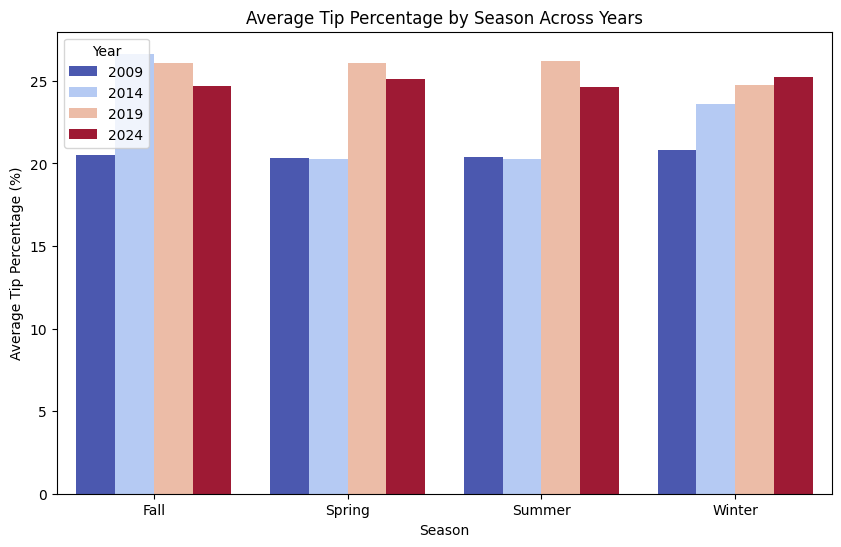

In [ ]:
season_mapping = {
    12: 'Winter', 1: 'Winter', 2: 'Winter',
    3: 'Spring', 4: 'Spring', 5: 'Spring',
    6: 'Summer', 7: 'Summer', 8: 'Summer',
    9: 'Fall', 10: 'Fall', 11: 'Fall'
}

df_all['season'] = df_all['month'].map(season_mapping)

avg_tip_pct_by_season = df_all.groupby(['year', 'season'])['tip_pct'].mean().reset_index()

plt.figure(figsize=(10, 6))
sns.barplot(data=avg_tip_pct_by_season, x='season', y='tip_pct', hue='year', palette='coolwarm')

plt.xlabel('Season')
plt.ylabel('Average Tip Percentage (%)')
plt.title('Average Tip Percentage by Season Across Years')
plt.legend(title='Year')
plt.show()

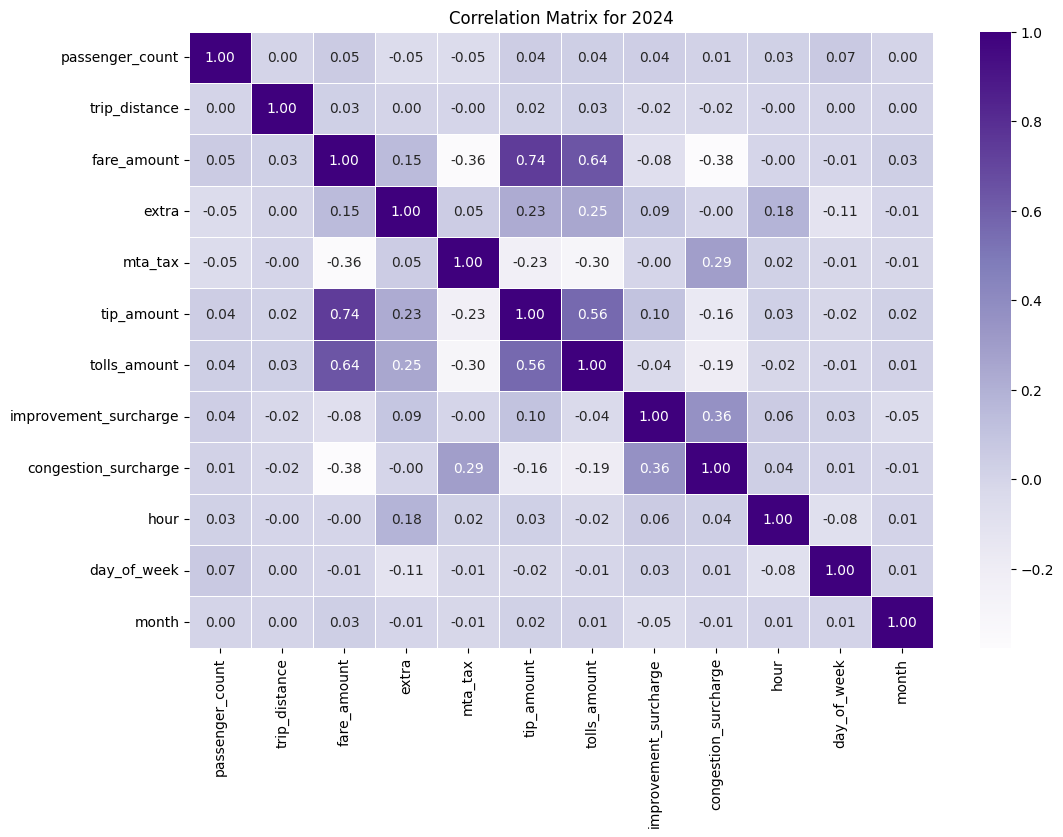

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

selected_columns = ['passenger_count', 'trip_distance', 'fare_amount', 'extra', 'mta_tax', 'tip_amount', 'tolls_amount', 'improvement_surcharge', 'congestion_surcharge', 'hour', 'day_of_week', 'month']
correlation_matrix = df2024[selected_columns].corr()

plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='Purples', fmt=".2f", linewidths=0.5)
plt.title("Correlation Matrix for 2024")
plt.show()

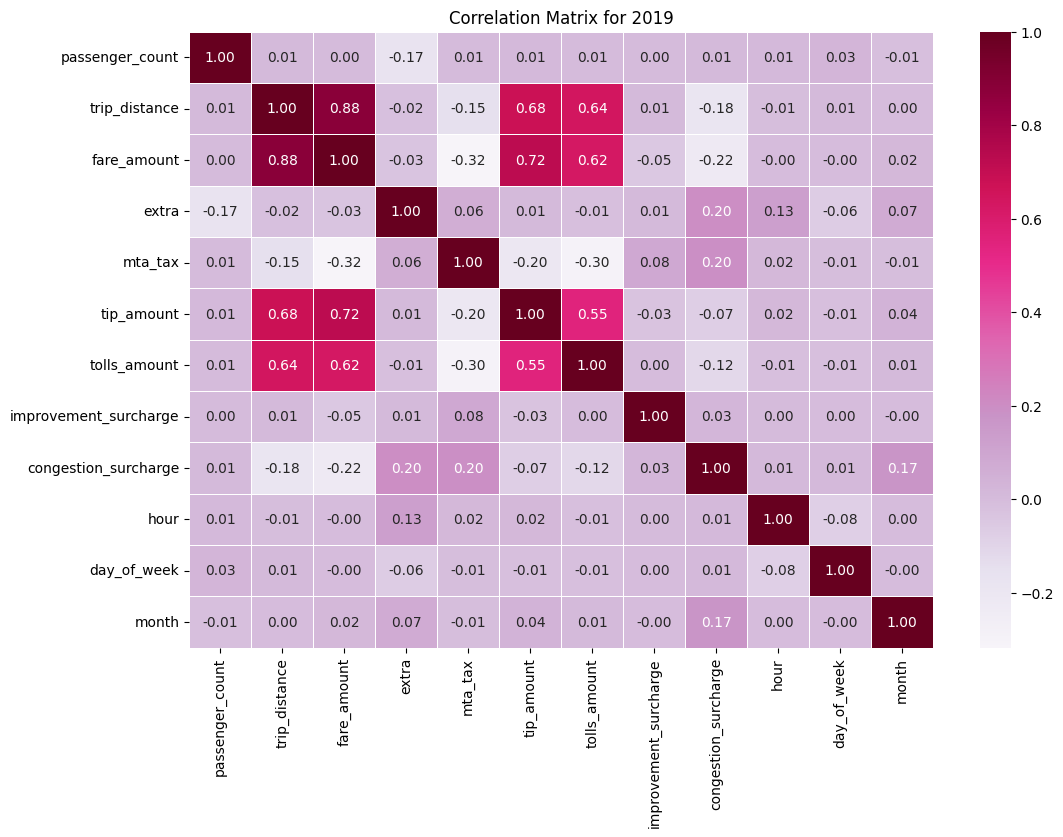

In [ ]:
selected_columns = ['passenger_count', 'trip_distance', 'fare_amount', 'extra', 'mta_tax', 'tip_amount', 'tolls_amount', 'improvement_surcharge', 'congestion_surcharge', 'hour', 'day_of_week', 'month']
correlation_matrix = df2019[selected_columns].corr()

plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='PuRd', fmt=".2f", linewidths=0.5)
plt.title("Correlation Matrix for 2019")
plt.show()

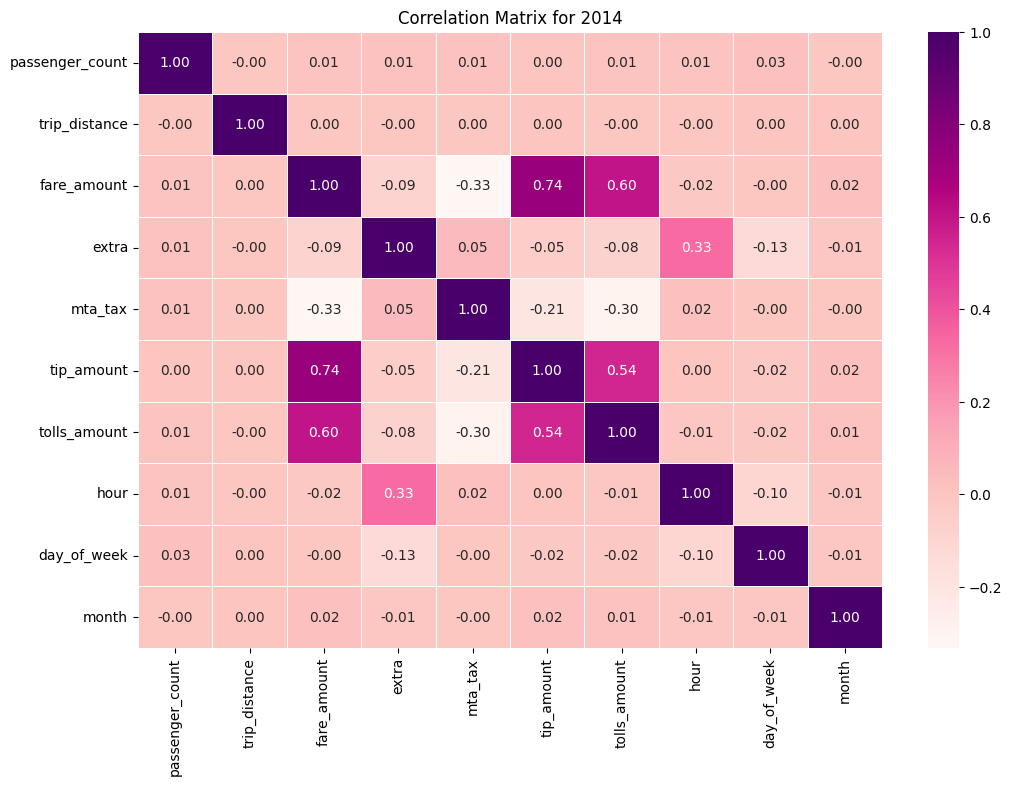

In [ ]:
selected_columns = [
    'passenger_count', 'trip_distance', 'fare_amount',
    'extra', 'mta_tax', 'tip_amount', 'tolls_amount',
    'hour', 'day_of_week', 'month'
]

correlation_matrix = df2014[selected_columns].corr()

plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='RdPu', fmt=".2f", linewidths=0.5)
plt.title("Correlation Matrix for 2014")
plt.show()

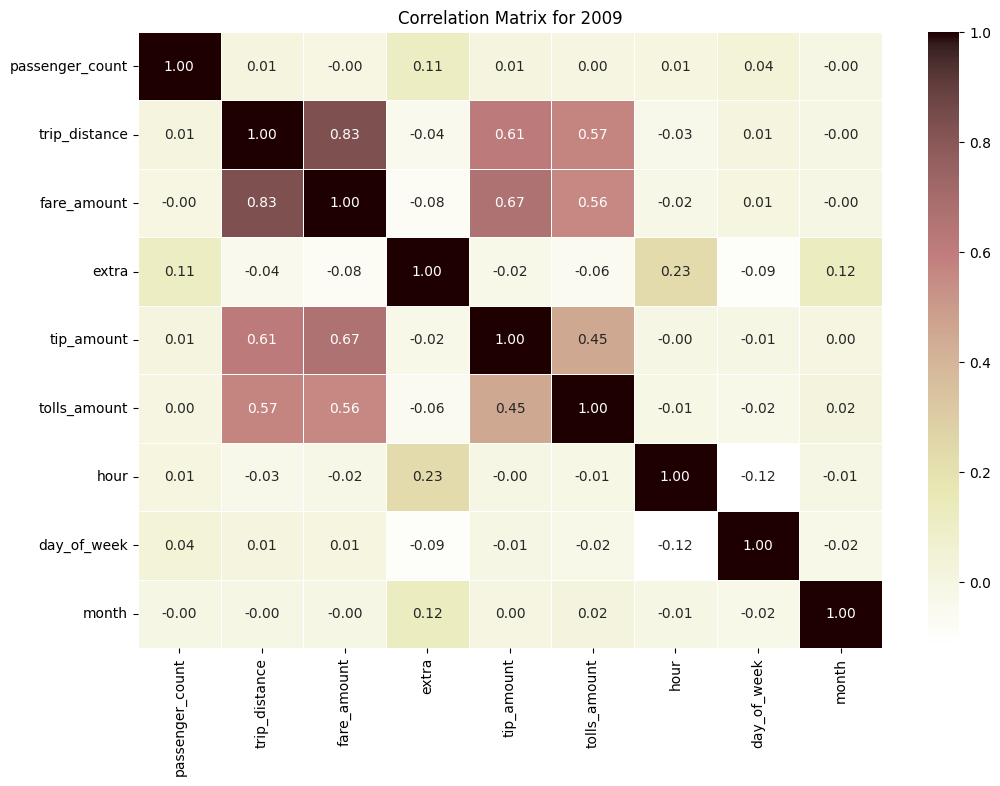

In [ ]:
selected_columns = [
    'passenger_count', 'trip_distance', 'fare_amount',
    'extra', 'tip_amount', 'tolls_amount',
    'hour', 'day_of_week', 'month'
]

correlation_matrix = df2009[selected_columns].corr()

plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='pink_r', fmt=".2f", linewidths=0.5)
plt.title("Correlation Matrix for 2009")
plt.show()

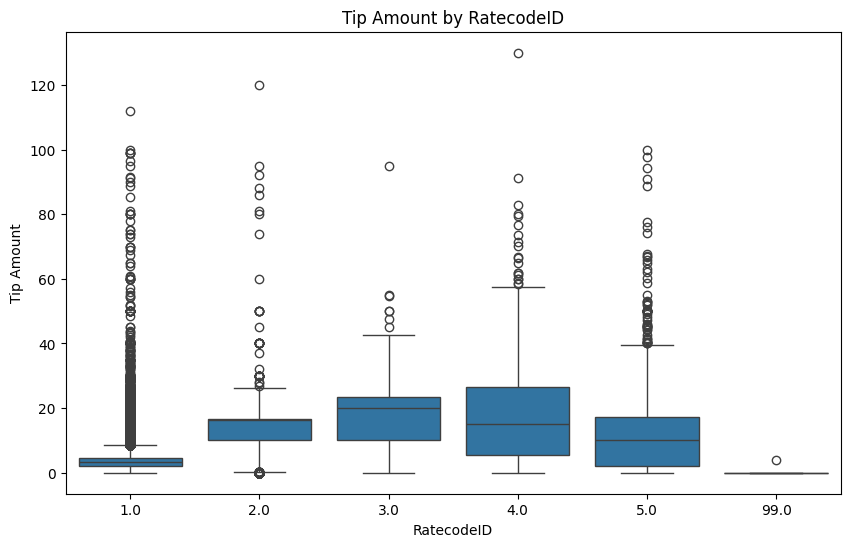

In [ ]:
# tip amount by RatecodeID
plt.figure(figsize=(10, 6))
sns.boxplot(data=df2024, x='RatecodeID', y='tip_amount')
plt.title('Tip Amount by RatecodeID')
plt.xlabel('RatecodeID')
plt.ylabel('Tip Amount')
plt.show()

Tip amount stats by VendorID:
              count      mean       std   min   25%   50%   75%     max
VendorID                                                              
1          99590.0  3.926591  3.866998  0.00  2.00  3.00  4.60  130.00
2         312087.0  4.521596  4.248536  0.00  2.24  3.33  5.00  112.00
7              1.0  8.910000       NaN  8.91  8.91  8.91  8.91    8.91


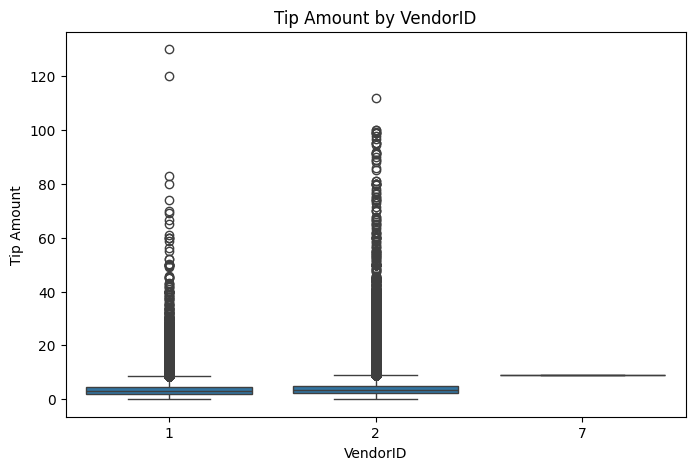

In [ ]:
# tip amount by VendorID
vendor_tip_stats = df2024.groupby('VendorID')['tip_amount'].describe()
print("Tip amount stats by VendorID:\n", vendor_tip_stats)

plt.figure(figsize=(8, 5))
sns.boxplot(data=df2024, x='VendorID', y='tip_amount')
plt.title('Tip Amount by VendorID')
plt.xlabel('VendorID')
plt.ylabel('Tip Amount')
plt.show()

Average tip for top 10 pickup locations:
 PULocationID
132    12.681031
138    10.566119
230     4.665866
186     3.979095
161     3.965376
162     3.839437
170     3.758025
142     3.496613
236     3.288804
237     3.234651
Name: tip_amount, dtype: float64


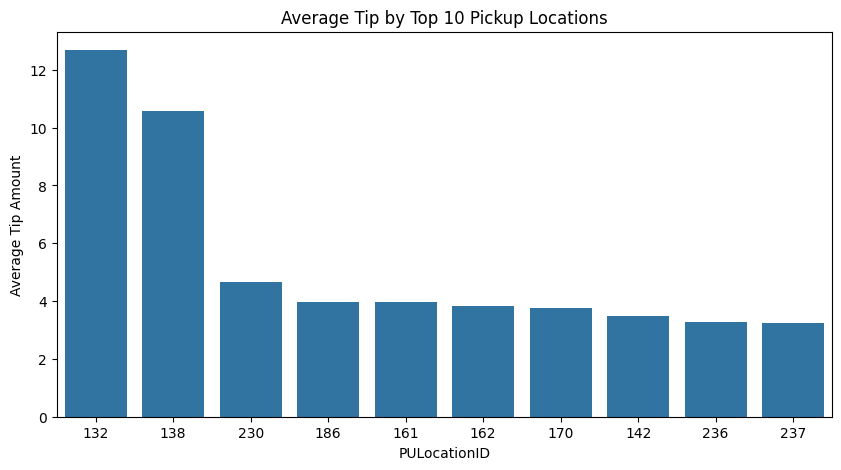

In [ ]:
# average tip by top 10 pickup locations
top_pu = df2024['PULocationID'].value_counts().nlargest(10).index
top_pu_df = df2024[df2024['PULocationID'].isin(top_pu)]

pickup_tip_avg = top_pu_df.groupby('PULocationID')['tip_amount'].mean().sort_values(ascending=False)
print("Average tip for top 10 pickup locations:\n", pickup_tip_avg)

plt.figure(figsize=(10, 5))
sns.barplot(x=pickup_tip_avg.index.astype(str), y=pickup_tip_avg.values)
plt.title('Average Tip by Top 10 Pickup Locations')
plt.xlabel('PULocationID')
plt.ylabel('Average Tip Amount')
plt.show()

Average tip for top 10 drop-off locations:
 DOLocationID
230    5.204543
164    4.389479
48     4.226842
163    4.170865
161    4.022149
68     3.970255
162    3.901324
238    3.851966
239    3.827609
186    3.809548
79     3.748748
170    3.740601
263    3.738967
142    3.717235
107    3.562224
229    3.555085
141    3.473335
234    3.466212
236    3.408848
237    3.264317
Name: tip_amount, dtype: float64


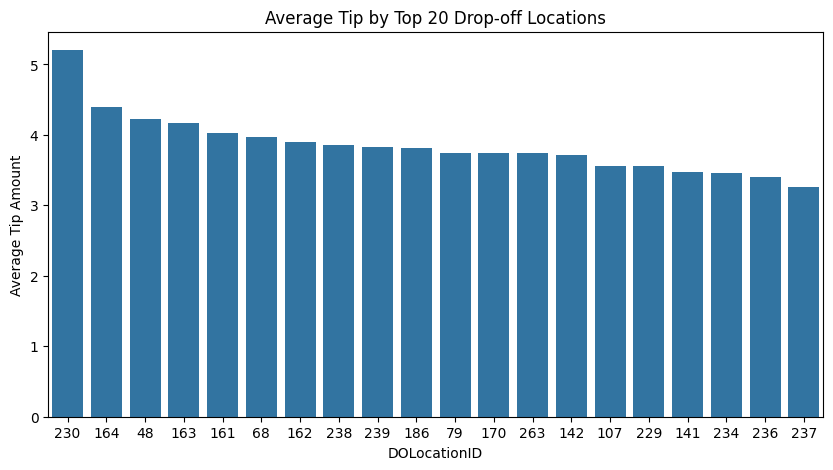

In [ ]:
# average tip for top 10 drop-off locations
top_do = df2024['DOLocationID'].value_counts().nlargest(20).index
top_do_df = df2024[df2024['DOLocationID'].isin(top_do)]

dropoff_tip_avg = top_do_df.groupby('DOLocationID')['tip_amount'].mean().sort_values(ascending=False)
print("Average tip for top 10 drop-off locations:\n", dropoff_tip_avg)

plt.figure(figsize=(10, 5))
sns.barplot(x=dropoff_tip_avg.index.astype(str), y=dropoff_tip_avg.values)
plt.title('Average Tip by Top 20 Drop-off Locations')
plt.xlabel('DOLocationID')
plt.ylabel('Average Tip Amount')
plt.show()

In [ ]:
from scipy.stats import f_oneway

anova_result = f_oneway(
    df2009['tip_amount'],
    df2014['tip_amount'],
    df2019['tip_amount'],
    df2024['tip_amount']
)

print("ANOVA Results for Tip Amount Across Years")
print(f"F-statistic: {anova_result.statistic:.2f}")
print(f"P-value: {anova_result.pvalue:.5f}")

# Interpretation
if anova_result.pvalue < 0.05:
    print("→ The differences in average tip amounts across years are statistically significant.")
else:
    print("→ No statistically significant difference in tip amounts across years.")


ANOVA Results for Tip Amount Across Years
F-statistic: 82961.10
P-value: 0.00000
→ The differences in average tip amounts across years are statistically significant.


Machine Learning

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

X = df2024.drop(['tip_amount'],axis=1)
X = X.drop(['tpep_pickup_datetime'],axis=1)
X = X.drop(['tpep_dropoff_datetime'],axis=1)
y = df2024['tip_amount']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

y_pred = rf.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f"Random Forest Model Performance:")
print(f"RMSE: {rmse:.2f}")
print(f"R² Score: {r2:.4f}")

Random Forest Model Performance:
RMSE: 2.61
R² Score: 0.5913


# Chi-Square Implementation/DType Conversion


In [ ]:
columns_to_string = ['payment_type', 'RatecodeID', 'PULocationID', 'DOLocationID']
df2024[columns_to_string] = df2024[columns_to_string].astype(str)

In [ ]:
df_cat = pd.DataFrame(data = df2024.dtypes, columns =
                                         ['a']).reset_index()

In [ ]:
cat_var = list(df_cat['index'].loc[df_cat['a'] == 'object'])
cat_var

['RatecodeID', 'PULocationID', 'DOLocationID', 'payment_type']

In [ ]:
df2024.dtypes

,0
VendorID,int32
tpep_pickup_datetime,datetime64[us]
tpep_dropoff_datetime,datetime64[us]
passenger_count,float64
trip_distance,float64
RatecodeID,object
PULocationID,object
DOLocationID,object
payment_type,object
fare_amount,float64


In [ ]:
df_cat = df2024[cat_var]
df_cat.head()

,RatecodeID,PULocationID,DOLocationID,payment_type
0,1.0,107,229,1
1,1.0,132,203,1
2,1.0,50,261,1
3,1.0,233,236,1
4,1.0,239,142,1


In [ ]:
df_cat_v1 = df_cat.dropna()
df_cat_v1.shape

(411678, 4)

In [ ]:
cat_var1 = ('RatecodeID', 'PULocationID', 'DOLocationID', 'payment_type')
cat_var2 = ('RatecodeID', 'PULocationID', 'DOLocationID', 'payment_type')

In [ ]:
from itertools import product
cat_var_prod = list(product(cat_var1,cat_var2, repeat = 1))
cat_var_prod

[('RatecodeID', 'RatecodeID'),
 ('RatecodeID', 'PULocationID'),
 ('RatecodeID', 'DOLocationID'),
 ('RatecodeID', 'payment_type'),
 ('PULocationID', 'RatecodeID'),
 ('PULocationID', 'PULocationID'),
 ('PULocationID', 'DOLocationID'),
 ('PULocationID', 'payment_type'),
 ('DOLocationID', 'RatecodeID'),
 ('DOLocationID', 'PULocationID'),
 ('DOLocationID', 'DOLocationID'),
 ('DOLocationID', 'payment_type'),
 ('payment_type', 'RatecodeID'),
 ('payment_type', 'PULocationID'),
 ('payment_type', 'DOLocationID'),
 ('payment_type', 'payment_type')]

In [ ]:
from scipy import stats as ss
result = []
for i in cat_var_prod:
  if i[0] != i[1]:
    result.append((i[0],i[1],list(ss.chi2_contingency(pd.crosstab(df_cat_v1[i[0]], df_cat_v1[i[1]])))[1]))
result

[('RatecodeID', 'PULocationID', np.float64(0.0)),
 ('RatecodeID', 'DOLocationID', np.float64(0.0)),
 ('RatecodeID', 'payment_type', 1.0),
 ('PULocationID', 'RatecodeID', np.float64(0.0)),
 ('PULocationID', 'DOLocationID', np.float64(0.0)),
 ('PULocationID', 'payment_type', 1.0),
 ('DOLocationID', 'RatecodeID', np.float64(0.0)),
 ('DOLocationID', 'PULocationID', np.float64(0.0)),
 ('DOLocationID', 'payment_type', 1.0),
 ('payment_type', 'RatecodeID', 1.0),
 ('payment_type', 'PULocationID', 1.0),
 ('payment_type', 'DOLocationID', 1.0)]

In [ ]:
chi_test_output = pd.DataFrame(result, columns = ['var1', 'var2', 'coeff'])

In [ ]:
chi_test_output.pivot(index='var1', columns='var2', values='coeff')

var2,DOLocationID,PULocationID,RatecodeID,payment_type
var1,,,,
DOLocationID,NaN,0.0,0.0,1.0
PULocationID,0.0,NaN,0.0,1.0
RatecodeID,0.0,0.0,NaN,1.0
payment_type,1.0,1.0,1.0,NaN
